<a href="https://colab.research.google.com/github/fclubb/SciRes-Earthquakes/blob/main/Practical2_plus_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Research Project 7 - Practical 2 Plus Answers

## Spatial and temporal analysis of the earthquake dataset
In the first week, we downloaded a CSV file of earthquake information from the USGS database and used Python to make some map plots of the dataset. In this notebook, we're going to use some more Python to perform some analysis on the spatial and temporal distribution of earthquakes in the San Francisco region.
****

**Firstly, copy the notebook to your Google Drive using the COPY TO DRIVE button.**

Now we'll import the packages that we need again. This should be familiar from last time.

In [1]:
# import several helpful packages that we'll use
import numpy as np # linear algebra
import pandas as pd # data processing. We can read in csv files using pd.read_csv('path/to/csv-file')
import matplotlib.pyplot as plt # package for making figures
import matplotlib.cm as cm # for choosing colourmaps


Now we have to load our earthquake data into Google Colab. This is the exact same as we did last week using the USGS CSV file that you downloaded. To do this, click the small folder icon on the left hand bar and then click `Upload to Session Storage`. You can then navigate to the CSV file we downloaded and add it to Google Colab.

**NOTE** - you will have to re-upload the data to Google Colab whenever you want to run this notebook. 

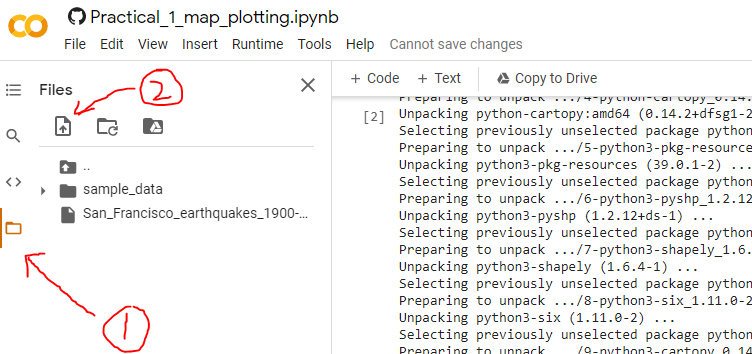

Once you have uploaded the file and you can see it in the left hand bar, we can then load it into Python again using the code in the cell below.

In [2]:
df = pd.read_csv('San_Francisco_earthquakes_1900-2020.csv') # This needs to correspond to the name of the file you uploaded. You can change it to represent your own file 

## Spatial analysis

Last week, we made some plots of how earthquakes were distributed, but we didn't think about how to **quantitatively measure** that distribution. One way of doing this is to do a _cluster analysis_: we will try to identify groups of earthquakes which have a similar spatial location.  One of the most common types of cluster analysis is called `K-means` clustering: this analysis will split the dataset into a user-defined number of clusters, or $K$ clusters (that's why it's called K-means). 

K-means clustering is a type of unsupervised machine learning algorithm. You can read this tutorial for details about how K-means clustering works: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
You can also look at the Python user guide for K-means which provides a lot of information: https://scikit-learn.org/stable/modules/clustering.html#k-means

The good thing about this algorithm is that it's very simple and easy to understand. However, one of the downsides is that we have to decide the number of clusters, or groups, that we want to end up with in advance. The result will be dependent on the number of clusters, or value of $K$, that you choose. Here we start with clustering into 5 groups ($K = 5$) but you should experiment and find a value of $K$ that looks appropriate for your dataset. We will start by importing the K-means package:


In [3]:
# import K means clustering package from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

Now that we've got our dataframe, let's run the K-means clustering algorithm. We'll define a variable $K=5$ which sets the number of clusters that we want.

In [4]:
# set K = number of clusters you want
K = 5

The next step is to get the X and Y values for clustering from our data. In our case, the X value is the longitude and the Y value is the latitude. We then run the clustering on the data.

In [5]:
# get the longitude and latitude
data = df[['longitude', 'latitude']]
# run the K-means clustering on the data with K number of clusters
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit_predict(data)

The `clusters` variable is now a list of the cluster number that was assigned to each earthquake. Python always starts counting at 0, so we have 5 clusters: cluster 0, cluster 1, cluster 2, cluster 3, and cluster 4:

In [6]:
clusters

array([4, 4, 1, 4, 0, 2, 1, 0, 4, 1, 1, 1, 0, 2, 0, 1, 4, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 0, 4, 4, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 4,
       4, 4, 0, 0, 0, 1, 0, 4, 1, 4, 1, 2, 2, 0, 0, 4, 4, 4, 2, 0, 0, 0,
       0, 0, 4, 2, 2, 4, 4, 2, 0, 4, 0, 0, 2, 0, 4, 3, 1, 0, 4, 4, 2, 2,
       2, 0, 2, 4, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 4, 2, 0, 0, 0, 1, 2, 0,
       4, 1, 2, 2, 2, 2, 0, 0, 0, 4, 1, 0, 1, 1, 2, 2, 1, 0], dtype=int32)

We can now make a simple scatter plot of the earthquakes coloured by the cluster number.

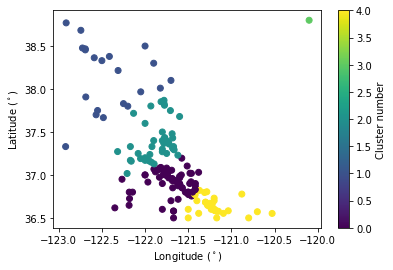

In [7]:
# make a simple X and Y plot with the points coloured by the cluster number
cbar = plt.scatter(data['longitude'], data['latitude'], c=clusters)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
# add a colour bar
plt.colorbar(cbar, label='Cluster number')

We can add the cluster number back in to our original dataframe, and then use pandas to save it as a new CSV file:

In [8]:
df['cluster_number'] = clusters
df.to_csv('San_Francisco_earthquakes_plus_clustering.csv', index=False)

### Testing if points are randomly distributed
Another test, which might be more useful, would be to check whether the earthquakes are randomly distributed, often called _Complete Spatial Randomness (CSR)_, or whether they are clustered into groups. To do that, we will install and import some libraries for analysing point patterns:

In [9]:
# download and install the point pattern library
!pip install libpysal pointpats
import libpysal as ps
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs

/usr/local/lib/python3.6/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [10]:
# make a point pattern from the latitude and longitude and print the summary
pp = PointPattern(data)
pp.summary()

Point Pattern
172 points
Bounding rectangle [(-122.92,36.5), (-120.1,38.8)]
Area of window: 6.486000000000047
Intensity estimate for window: 26.518655565833914
            x          y
0 -121.274000  36.645500
1 -121.244333  36.630500
2 -122.312333  38.215167
3 -121.180833  36.584333
4 -121.496333  36.771167


To test whether points in the pattern are randomly distributed, we will use what's called a _Quadrat Statistic_. This comes from ecology, where a common way of counting the distribution of, say, beetles or plants, is by dividing an area up in to rectangles and counting the number of organisms in each rectangle. If the organisms are randomly distributed, then there should be an even number of them in each rectangle. You can see more explanation in this document: https://www.seas.upenn.edu/~ese502/NOTEBOOK/Part_I/3_Testing_Spatial_Randomness.pdf

Here we will set up our quadrats to be rectangle shapes with 3 rows (`ny`)and 3 columns (`nx`). One disadvantage of this method is that it can be sensitive to the number of rectangles that you choose. You can test the sensitivity by changing `nx` and `ny` in the function below. 

In [11]:
q_r = qs.QStatistic(pp,shape= "rectangle",nx = 3, ny = 3)

We can plot the quadrats, which will show you how many earthquakes are located in each one. Just from looking at the numbers, we can see that there is a very uneven distribution of earthquakes across the region.

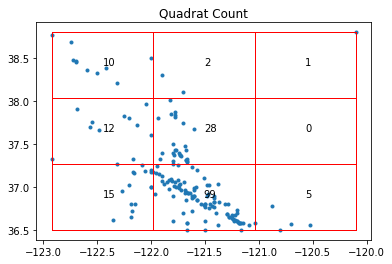

In [12]:
q_r.plot()

But how can we say that statistically? The easiest way to test the CSR hypothesis is to use the Pearson $\chi^2$ goodness-of-fit test. This works by comparing the _expected_ number of points in each rectangle if the dataset was random, to the _actual_ number of points in each rectangle that we observe.
You can read this notebook for a very nice explanation of how this works (focus on Section 3.1): https://joparga3.github.io/spatial_point_pattern/

Our null hypothesis, that the points are randomly distributed, would occur if we have a $\chi^2$ statistic with a $p$-value greater than 0.05. If $p > 0.05$ it means we can't reject the null hypothesis at a 95% confidence level.

Our alternative hypothesis, that the points are clustered, would occur if $p < 0.05$. So let's look at our results:


In [13]:
q_r.chi2 

407.9767441860466

In [14]:
q_r.chi2_pvalue

3.681655621499739e-83

We can see that we have a $p$ value _much_ smaller than 0.05! This means we can reject the null hypothesis and state that the earthquakes are not randomly located.

### Exercise 1: Spatial analysis
In this section, we've explored a couple of statistical techniques that you could use to analyse the spatial distribution of earthquakes. Try the following:

1. Think about what the K-means clusters tell you. Does the machine learning algorithm relate to the tectonic setting around San Francisco?

_The machine learning algorithm hasn’t worked very well – the faults in the region tend to trend NW-SE, whereas the clusters appear to be banded mainly by latitude! This is a common issue with using unsupervised classification algorithms – the computer doesn’t know anything about the physical processes going on._

2. Re-run the K-means clustering with different numbers of clusters (change the value of $K$). How does this affect the results?

_To do this you need to change the value of K in the second code block. The default value is 5 – you could try creating more or fewer clusters to see if this affects the clustering. Here I have changed to 10 clusters – this seems to break down the earthquakes in a slightly more sensible way (the San Andreas Fault is now separated from the Calaveras Fault)_


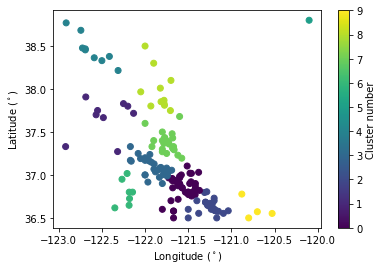

In [15]:
K = 10

# get the longitude and latitude
data = df[['longitude', 'latitude']]

# run the K-means clustering on the data with K number of clusters
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit_predict(data)

# make a simple X and Y plot with the points coloured by the cluster number
cbar = plt.scatter(data['longitude'], data['latitude'], c=clusters)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
# add a colour bar
plt.colorbar(cbar, label='Cluster number')

3. Practice your Python by modifying the scatter plot of earthquakes coloured by cluster number. You can try changing the colourscale, the size of the points, the marker style, etc. Can you work out how to save this plot as an image? (HINT: see notebook from last week for example of how to do this).

_It’s up to you how to modify it – you could try changing to a discrete colourscale which might make the clusters easier to see._
_To save it as an image you need to add the line:

```
plt.savefig('name of fig.png')
```

_at the end of the code block._

This example shows how to change the colour scale:

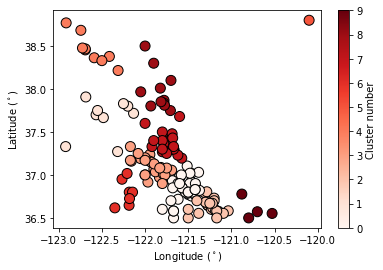

In [16]:
import matplotlib.cm as cm
# make a simple X and Y plot with the points coloured by the cluster number
# the cmap variable determintes the colour scale. You can change it to any of the named matplotlib colour scales to change the colour: https://matplotlib.org/tutorials/colors/colormaps.html
cmap = cm.Reds

# plot the points using a scatter plot. Some important parameters that you might want to change are:
# s = controls the size of the markers
# marker = controls the style of the markers. You can change it to 'D' for diamonds '.' for points, '+' for crosses, etc.
# edgecolors = controls the colour of the outline of the marker
cbar = plt.scatter(data['longitude'], data['latitude'], c=clusters, s=100, cmap=cmap, marker='o', edgecolors='black')

# add axis labels
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')

# add a colour bar
plt.colorbar(cbar, label='Cluster number')

4. The quadrat method for testing whether points are randomly located can be dependent on the number and size of rectangles that are used. Try varying the number of rectangles, and look at the difference in the $\chi^2$ statistic and $p$ value. Does it have a significant impact on our hypothesis testing? If it does, this would be quite worrying, as it means our statistic wouldn't be very reliable.

_On testing I found that the p value was still less than 0.05 when you vary nx/ny between 2 and 7 (making the number of rectangles higher than that becomes a bit pointless). This means we can be very confident that the earthquakes are not randomly distributed. 
Worth pointing out that, while this might sound obvious (we know earthquakes are occurring along faults), probabilistic seismic hazard assumes that earthquakes occur randomly within a source region. However, from our plots it’s clear that the southern faults have had many more earthquakes than the northern ones._

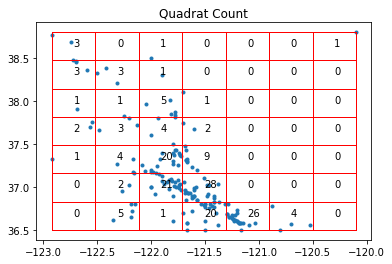

In [17]:
q_r = qs.QStatistic(pp,shape= "rectangle",nx = 7, ny = 7)
q_r.plot()

In [18]:
q_r.chi2 

664.4186046511627

In [19]:
q_r.chi2_pvalue

2.1595605233150263e-109

**BONUS QUESTION** for those who want to mess around with Python more:

5. At the end of the K-means clustering, we saved the output to a new CSV file. In a new cell, try to read this to a dataframe using pandas. Then use the code from the first notebook to make a `cartopy` map plot of the earthquakes coloured by cluster number. (HINT - modify the last code block in Practical 1).

_We'll do this in this notebook by importing `cartopy` and then copying the code from Practical 1. You could also load the new CSV file into last week's notebook._

In [23]:
!pip install cartopy
import cartopy

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


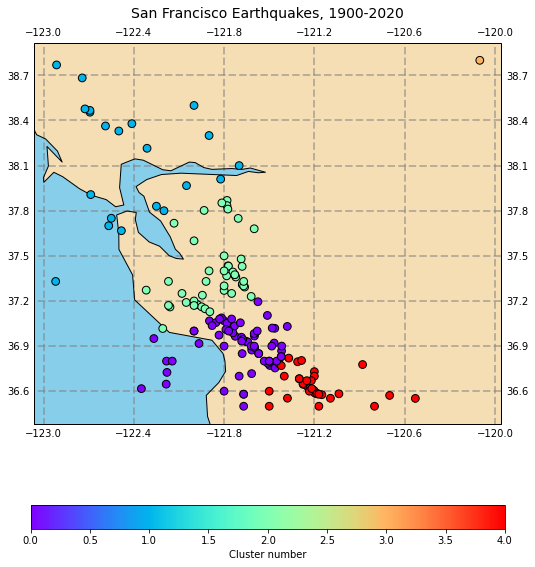

In [24]:
# set up a figure and choose the size by defining the width,height in inches.
plt.figure(figsize=(10,10))
# define an axis for the figure. We need to define the map projection for the figure - we will use Plate Carree.
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# add gridlines to show the latitude and longitude
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', zorder=1)

# The title of the plot
ax.set_title('San Francisco Earthquakes, 1900-2020', fontsize=14, pad=25)

# We will use the natural earth dataset, which provides free mapping data, to add some background to the figure.
# display coastlines
ax.coastlines(resolution='50m')
# add the land
land = cartopy.feature.NaturalEarthFeature(category='physical', scale='50m', name='land', facecolor='wheat', zorder=0)
_ = ax.add_feature(land)
# add the ocean
ocean = cartopy.feature.NaturalEarthFeature(category='physical', scale='50m', name='ocean', facecolor='skyblue', zorder=0)
_ = ax.add_feature(ocean)

# make a scatter plot of the earthquakes. To colour by the cluster number, we set the variable c equal to the column in the dataframe (df['cluster_number'])
cmap = cm.rainbow # this is the colour scale for the magnitudes.
cbar = plt.scatter(x=df['longitude'], y=df['latitude'], zorder=2,    # X values = longitudes, Y values = latitudes. zorder controls the order of the layers to make the points plot above the land
                   c=df['cluster_number'], cmap=cmap, edgecolors='black', s=60) # c = colour of points, edgecolors = colour of point outlines, s = size of points.

# add a colourbar. You can change the label, orientation, etc.
plt.colorbar(cbar, cmap=cmap, label='Cluster number', shrink=0.85, orientation='horizontal')

# save the figure. You can change the name to whatever you want the image to be called.
plt.savefig('San_Francisco_Earthquakes_Cluster_1900-2020.png')
# show the figure in the notebook
plt.show()

## Temporal analysis
Now we're going to move on and think about analysing the distribution of earthquakes through _time_. Time series analysis is essential for many, many things in geographical research: just a few examples of time series data could be precipitation or temperature records, sea level, ice sheet volume, river discharge, carbon emissions, air pollution levels, etc., etc. 

Alongside geographical research, time series are widely used in finance, economics, business, or pretty much any area where a variable changes through time.
I would argue that dealing with time series is a fundamental and employable skill that you can learn from your degree!

We're going to learn how to make some simple plots and analyses of the earthquake time series from our pandas dataframe. One of the first things we could do is to simply plot the earthquakes through time according to their magnitude. 

`pandas` has a very nice function called `datetime` that is specially designed for dealing with timeseries. Our first step is to convert the index (the row numbers) of the dataframe to a datetime:

In [ ]:
# Convert the dataframe index to a pandas datetime
df.index = pd.to_datetime(df['time'])

If you print out the dataframe, you can see that the row numbers in the very left hand column have been replaced with the date. This means that we can use the date to refer to each row.

In [ ]:
df

We'll now make what's called a "stem plot" to show the earthquakes through time. This is a plot where there is a point for each earthquake, with a vertical line connecting it to the X axis. It makes it easier to see what year each earthquake occurred in.

In [ ]:
# set up a figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
# add the grid lines
ax.grid(color='0.8', linestyle='--', which='both')

# make a stem plot
markerline, stemlines, baseline = ax.stem(df.index, df.mag, linefmt='black', use_line_collection=True)

# adjust the markers and lines
markerline.set_markeredgecolor('k')
markerline.set_markerfacecolor('red')
stemlines.set_linewidth(0.5)
baseline.set_color('white')
markerline.set_markersize(10)

# add x and y labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Magnitude ($M$)', fontsize=14, labelpad=20)
# set the Y axis to start at magnitude 3
plt.ylim(3,)

# save as a figure
plt.savefig('San_Francisco_earthquakes_stem_plot.png')

### Number of earthquakes through time

Another analysis that we might want to do is to analyse how the number of earthquakes has changed through time. To do that, we can count the number of earthquakes in a given year. Our `pandas datetime` object can help us with this: we can simply group times by year:   

In [ ]:
# get the years from the dataframe
y = df.index.year
# group the dataframe by the year, and then get the count
freq_df = df.groupby(y)['id'].count().reset_index()
idx = freq_df['id'].argmax()
freq_df['time'][idx]


In [ ]:
plt.plot(freq_df['time'], freq_df['id'])
plt.ylabel('Number of earthquakes')
plt.xlabel('Time')
plt.savefig('n_quakes.png')

We could also make this a bar plot, rather than a line plot:

In [ ]:
plt.bar(freq_df['time'], freq_df['id'])
plt.ylabel('Number of earthquakes')
plt.xlabel('Time')

### Summary statistics through time

We might also want to look at how the mean or median of a parameter changes through time. To show an example, here I'll plot the mean depth of earthquakes through time:


In [ ]:
# get the years from the dataframe
y = df.index.year

In [ ]:
# group the dataframe by the year, and then get the mean depth in each year
depth_df = df.groupby(y)[['mag', 'depth']].mean().reset_index()

In [ ]:
depth_df

In [ ]:
plt.scatter(depth_df['time'], depth_df['depth'], c='cyan', edgecolor='black', s=60)
plt.xlabel('Time')
plt.ylabel('Mean depth (km)')

### Exercise 2: Temporal analysis
In this section, we've explored some plotting techniques to analyse the temporal distribution of earthquakes. Try the following:

1. Modify the plot of the number of earthquakes through time to make it look nicer. You could change the line/bar colours, change the font size, etc. Save it as a PNG file. 

* You can see the matplotlib documentation on [line plots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) or [bar plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) for help. Remember to look at the examples at the bottom of these pages: they show you nice examples of different plotting styles with code.


2. Try to plot some other summary statistics through time. For example, you could:
  * Make a plot of the median depth of each year through time.
  * Make a plot of the mean magnitude of each year through time.
  * Make a plot of the maximum magnitude of each year through time. 
  * Make sure to save these plots as PNG files. You can make these same figures to explore your own dataset for your project.

In [ ]:
# median depth through time
depth_df = df.groupby(y)['depth'].median().reset_index()
plt.scatter(depth_df['time'], depth_df['depth'], c='cyan', edgecolor='black', s=60)
plt.xlabel('Time')
plt.ylabel('Median depth (km)')

In [ ]:
# mean magnitude through time
mag_df = df.groupby(y)['mag'].mean().reset_index()
plt.scatter(mag_df['time'], mag_df['mag'], c='cyan', edgecolor='black', s=60)
plt.xlabel('Time')
plt.ylabel('Mean magnitude')

In [ ]:
# maximum magnitude through time
mag_df = df.groupby(y)['mag'].max().reset_index()
plt.scatter(mag_df['time'], mag_df['mag'], c='cyan', edgecolor='black', s=60)
plt.xlabel('Time')
plt.ylabel('Maximum magnitude')

_You can see that the plots of mean and maximum magnitude look very similar (this is to be expected). The depth data don’t seem to show any trend through time, and there are less data points, especially for earlier records. This is probably because older records were unable to work out earthquake depths due to technology issues (see Week 1 lecture)._


3. Think about what all these plots are telling you. Are there particular years in which there are more earthquakes? Can you identify which year had the highest magnitude earthquake? 

_Look at the plot showing the number of earthquakes through time. You should see that 1989 had significantly more earthquakes than any other year (16 compared to between 2 and 6 for all other years!)._

_The plot of maximum magnitude by year shows that 1906 had the highest magnitude earthquake (M8)._

4. From the plots you've made so far, choose two of the largest earthquakes. Do some research and find out some more information about these earthquakes. If they are large events, you should be able to find reports on them by Googling the year in which they occurred.

* Were there any fatalities resulting from these earthquakes?
* What was the economic damage?

_The two largest earthquakes are both very famous events. The largest one in 1906 is the Great San Francisco Earthquake that devastated much of San Francisco city centre: https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/_

_The second largest one is the Loma Prieta earthquake which occurred in 1989. You can read more about it here: https://pubs.usgs.gov/pp/pp1550/pp1550c/pp1550c.pdf_

5. As well as magnitude, earthquake depth is important for seismic hazard. Shallow earthquakes are often the most damaging, as the seismic waves have less distance through the Earth's crust to travel before reaching infrastructure, and therefore dissipate less energy. Looking at the plots of earthquake depth, do you see any trend in earthquake depth through time? 

_As discussed above, there doesn’t appear to be any trends in earthquake depth through time (we wouldn’t expect there to be)._

6. Modify your plot of the mean magnitude through time so that the points are coloured by earthquake depth. From this plot, which years would you expect the most damage from earthquake events to occur in?

_Your plot might look like the one below. We would expect the most damage to occur from the highest magnitude earthquakes, but also from the shallowest ones. So the 1906 earthquake would be damaging (highest magnitude), but potentially also the early 1980s (high magnitude, relatively shallow)._

In [ ]:
# answer to question 6
# group the dataframe by the year, and then get the mean magnitude depth in each year
y = df.index.year
summary_df = df.groupby(y)[['mag', 'depth']].mean().reset_index()

# import cm so we can change the colourmap
import matplotlib.cm as cm

# set up a figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
#add gridlines
plt.grid(color='0.8', linestyle='--', which='both')

#define the colourmap you want (reds)
cmap = cm.Reds

# make a scatter plot of
cbar = plt.scatter(summary_df['time'], summary_df['mag'], c=summary_df['depth'], cmap=cmap, edgecolor='black', s=60)
plt.xlabel('Time')
plt.ylabel('Mean magnitude')
plt.title('Magnitude and depth through time')

# add a colourbar. You can change the label, orientation, etc.
plt.colorbar(cbar, cmap=cmap, label='Earthquake depth (km)', orientation='vertical')
plt.savefig('mean_mag_depth.png')